## EDA

## LifeCycle of Machine Learning Project => 
1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to Perform 
4. Exploratory Data Analysis
5. Data Preprocessing
6. Model Training
7. Choose Best Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [9]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [19]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [20]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [21]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [22]:
df["total_score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average_score"] = df["total_score"] / 3

In [23]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [27]:
reading_full = df[df["reading score"] == 100]['average_score'].count()
writing_full = df[df["writing score"] == 100]['average_score'].count()
math_full = df[df["math score"] == 100]['average_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [29]:
reading_less_20 = df[df["reading score"] <= 20]["average_score"].count()
writing_less_20 = df[df["writing score"] <= 20]["average_score"].count()
math_less_20 = df[df["math score"] <= 20]["average_score"].count()


print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


# Reading has most full and math has worst scores

In [30]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


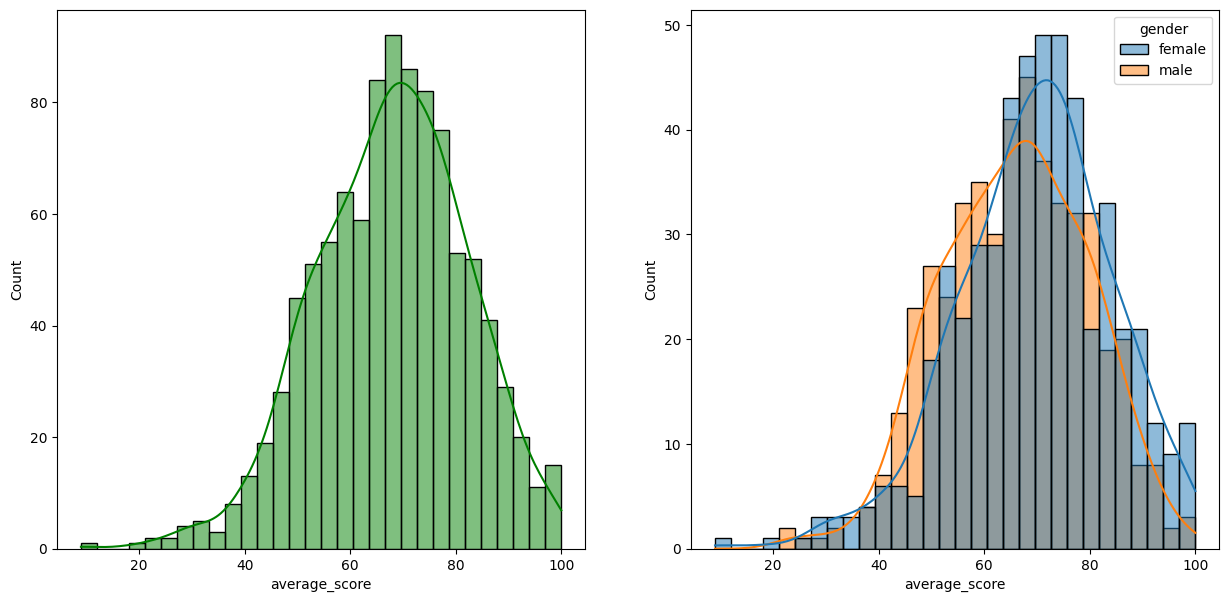

In [32]:
plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(df, x="average_score",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(df, x="average_score", bins=30,kde=True,hue="gender")
plt.show()

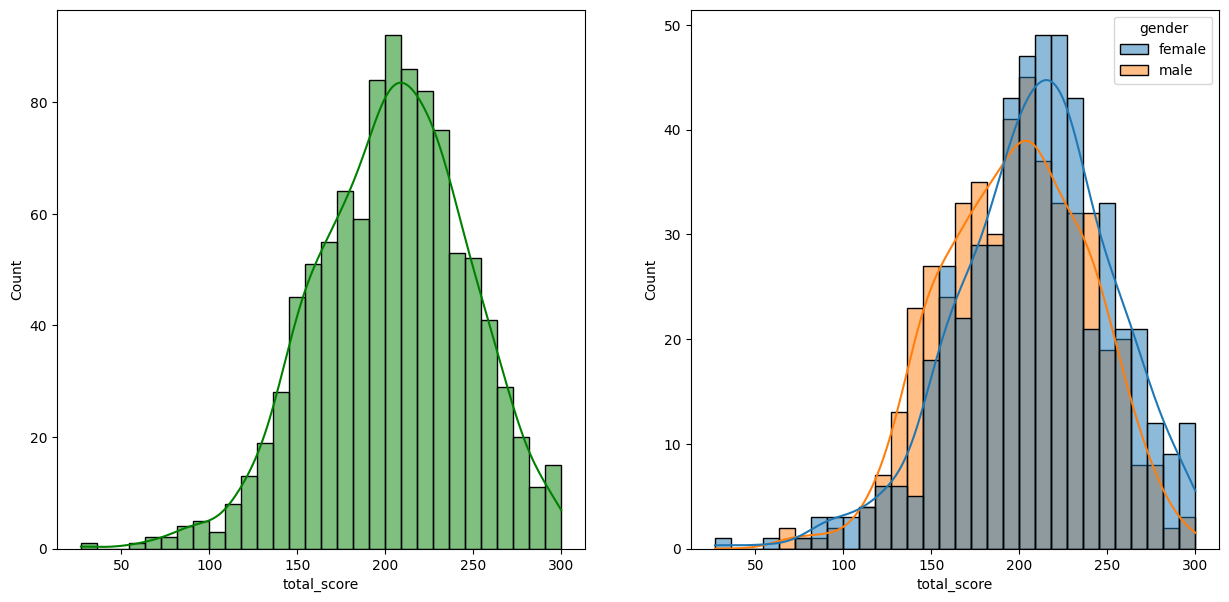

In [34]:
plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(df, x="total_score",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(df, x="total_score",bins=30, hue="gender",kde=True)
plt.show()

Female Average and Total Score is Higher than male, i.e, Female Performs better than Male

In [41]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

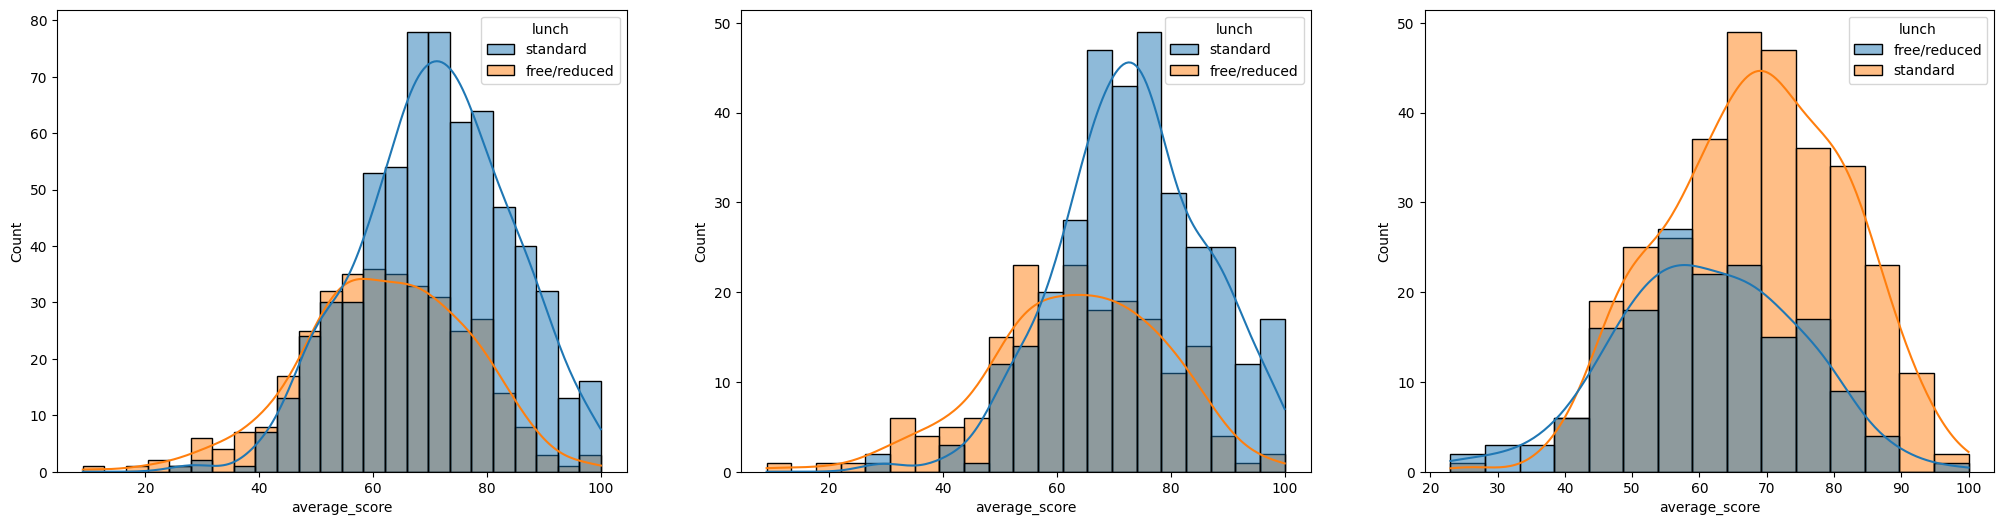

In [48]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(131)
sns.histplot(df, x="average_score", hue="lunch",kde=True)
plt.subplot(132)
sns.histplot(df[df["gender"] == "female"], x="average_score", hue="lunch", kde=True)
plt.subplot(133)
sns.histplot(df[df["gender"] == "male"], x="average_score", hue="lunch", kde=True)
plt.show()



Standard Meal Performs well in exams be it for male or for female

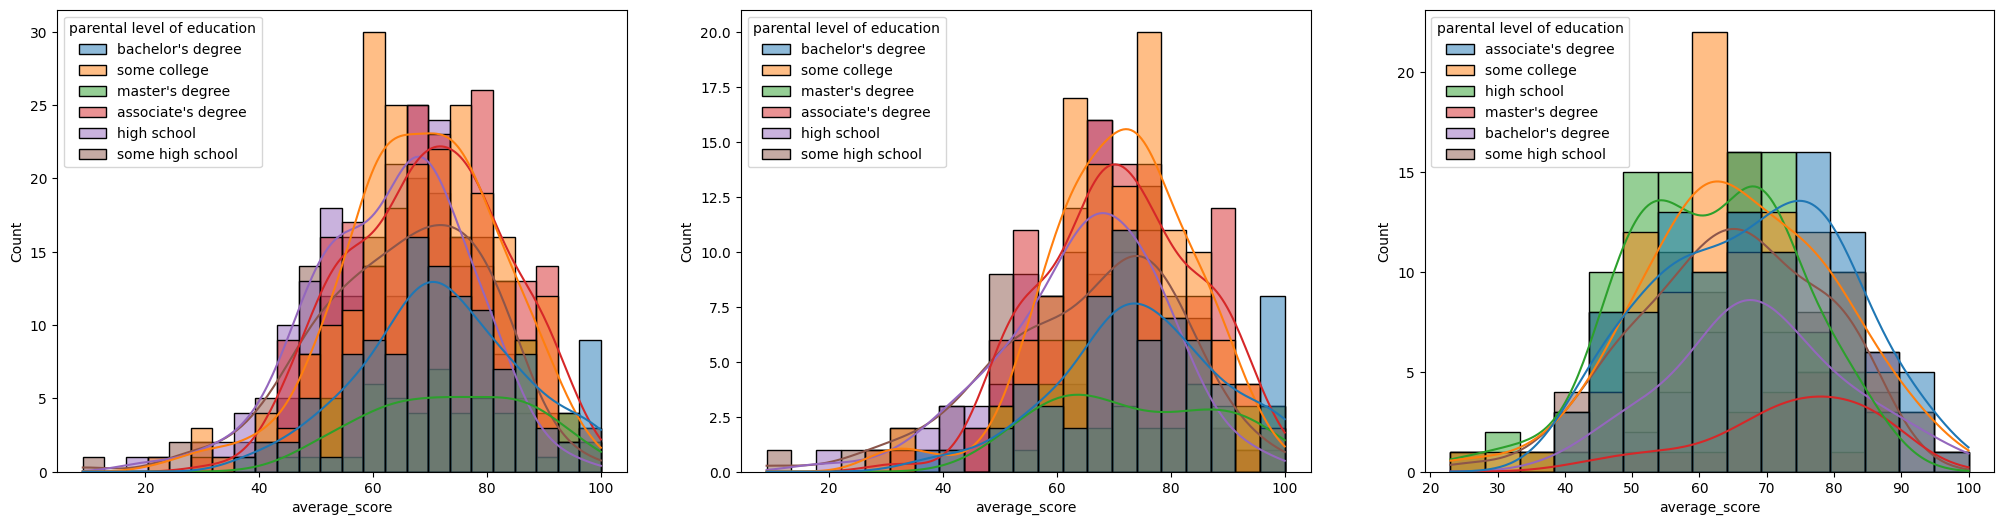

In [51]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(131)
sns.histplot(df, x="average_score", hue="parental level of education",kde=True)
plt.subplot(132)
sns.histplot(df[df["gender"] == "female"], x="average_score", hue="parental level of education", kde=True)
plt.subplot(133)
sns.histplot(df[df["gender"] == "male"], x="average_score", hue="parental level of education", kde=True)
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students

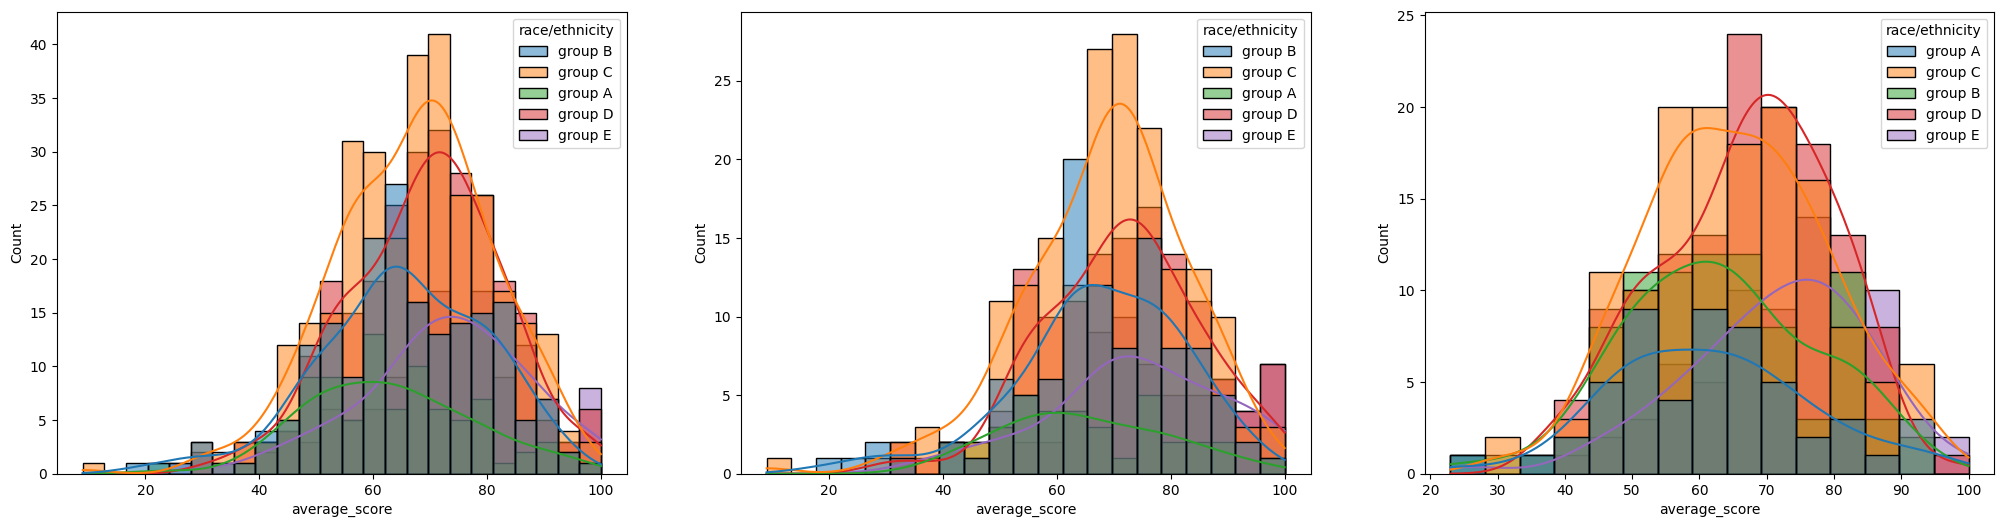

In [54]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(131)
sns.histplot(df, x="average_score", hue="race/ethnicity",kde=True)
plt.subplot(132)
sns.histplot(df[df["gender"] == "female"], x="average_score", hue="race/ethnicity", kde=True)
plt.subplot(133)
sns.histplot(df[df["gender"] == "male"], x="average_score", hue="race/ethnicity", kde=True)
plt.show()

Grp A, B performs poorly irrespective of gender

In [55]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


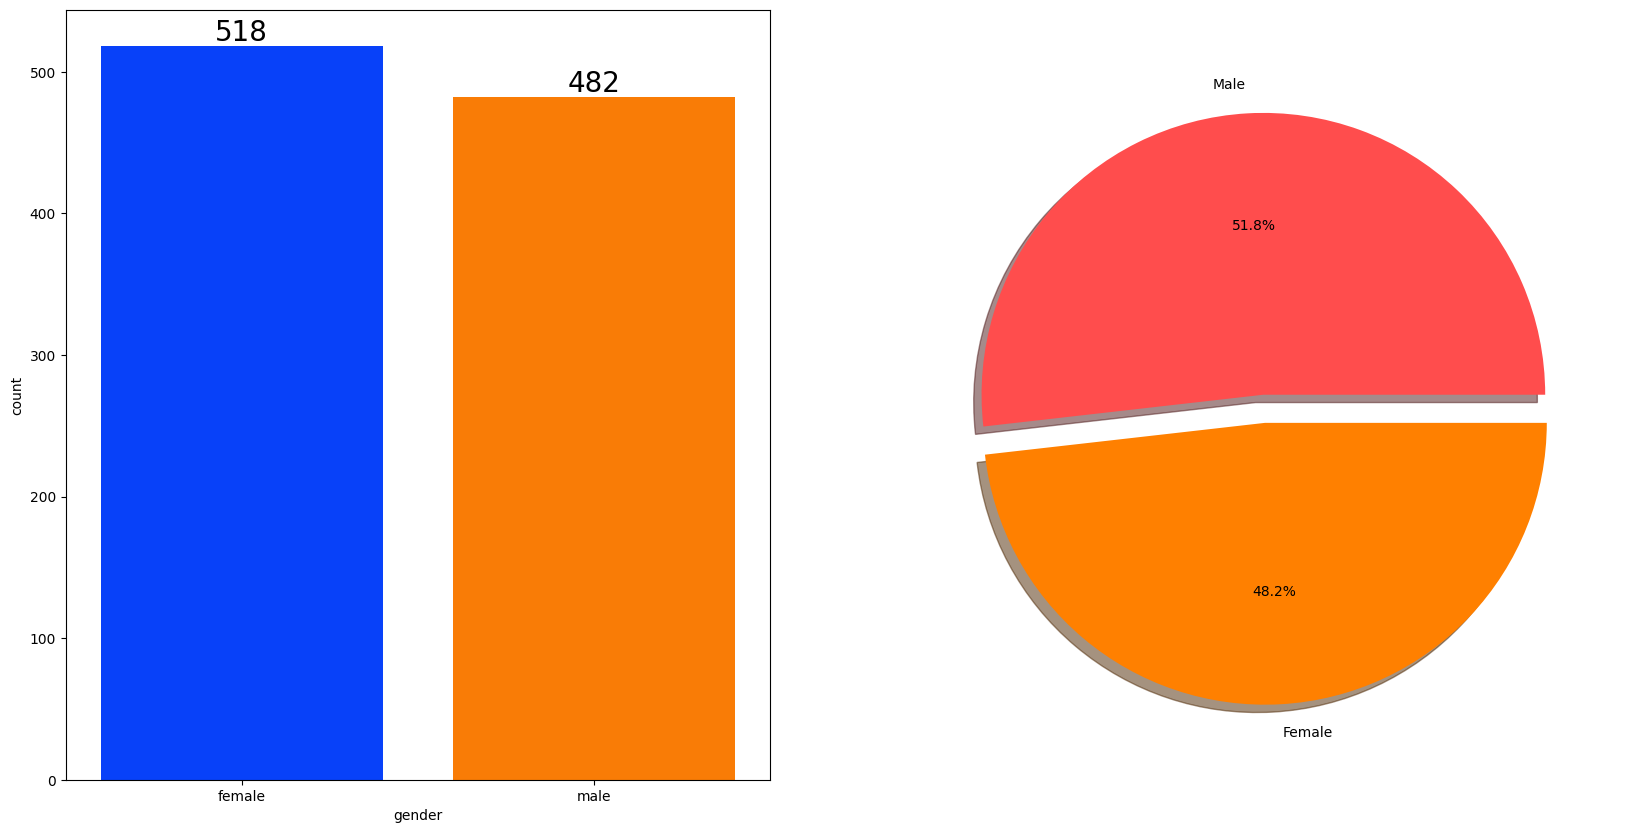

In [67]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [78]:
gender_group = df.groupby('gender')['total_score'].mean()
gender_group

gender
female    208.708494
male      197.512448
Name: total_score, dtype: float64

In [79]:
gender_group1 = df.groupby('gender')['math score'].mean()
gender_group1

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

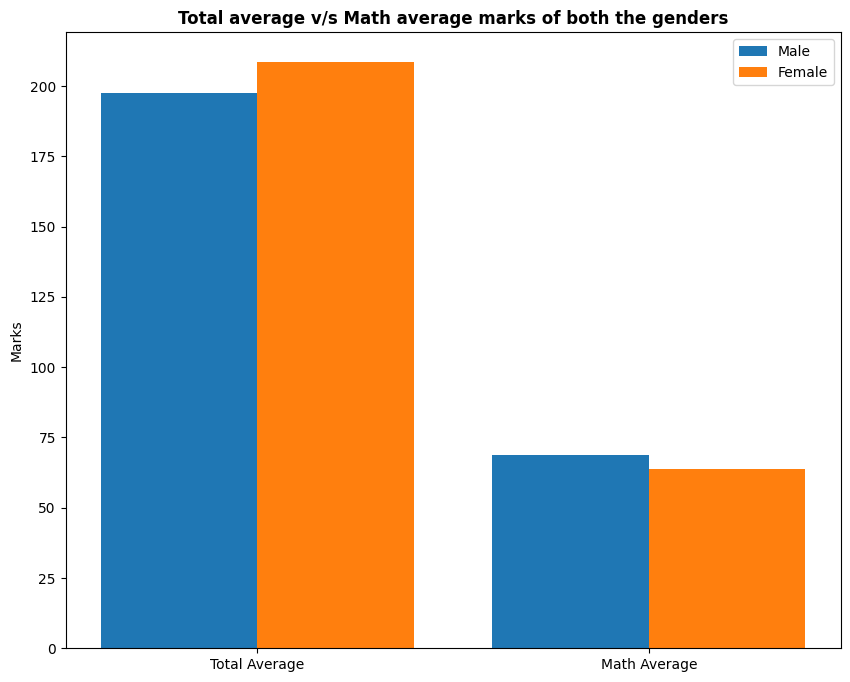

In [81]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group[0], gender_group1[0]]
male_scores = [gender_group[1], gender_group1[1]]

X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()


 On Average Total Score of Female is Higher than male whereas math score of male is higher than female

In [82]:
df["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

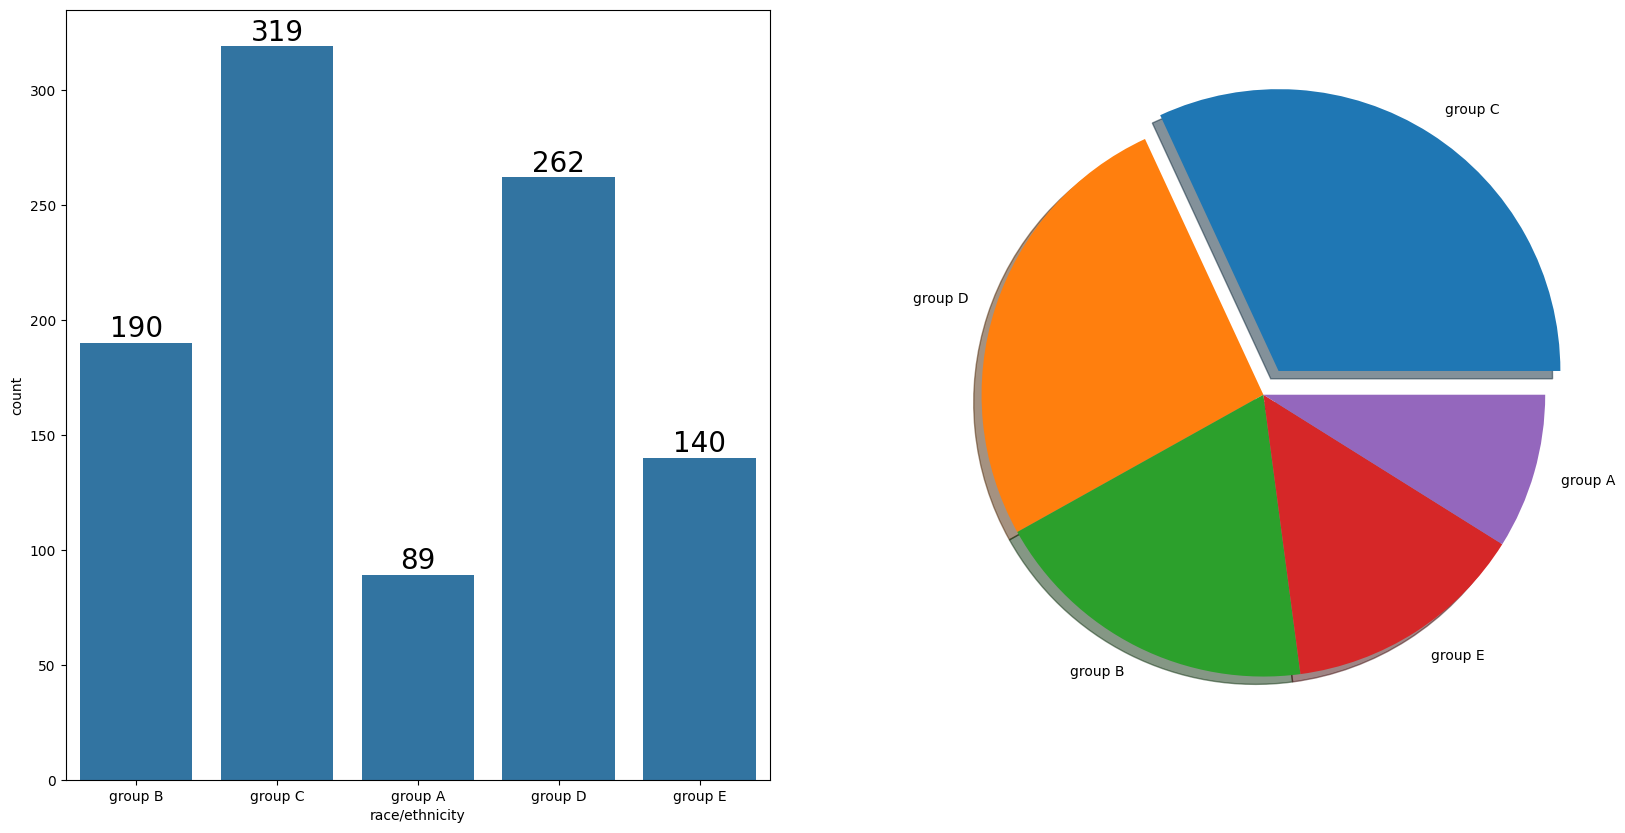

In [87]:
f,ax = plt.subplots(1,2,figsize=(20,10))

sns.countplot(data=df,x=df["race/ethnicity"],ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df["race/ethnicity"].value_counts(), labels=df["race/ethnicity"].value_counts().index, explode=[0.1,0,0,0,0],shadow=True)
plt.show()


Most Students Belongs to Grp C or D and least from Grp A

In [89]:
Group_data1 = df.groupby("race/ethnicity")['reading score'].mean()
Group_data1

race/ethnicity
group A    64.674157
group B    67.352632
group C    69.103448
group D    70.030534
group E    73.028571
Name: reading score, dtype: float64

In [90]:
Group_data2 = df.groupby("race/ethnicity")['math score'].mean()
Group_data2

race/ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: math score, dtype: float64

In [91]:
Group_data3 = df.groupby("race/ethnicity")['writing score'].mean()
Group_data3

race/ethnicity
group A    62.674157
group B    65.600000
group C    67.827586
group D    70.145038
group E    71.407143
Name: writing score, dtype: float64

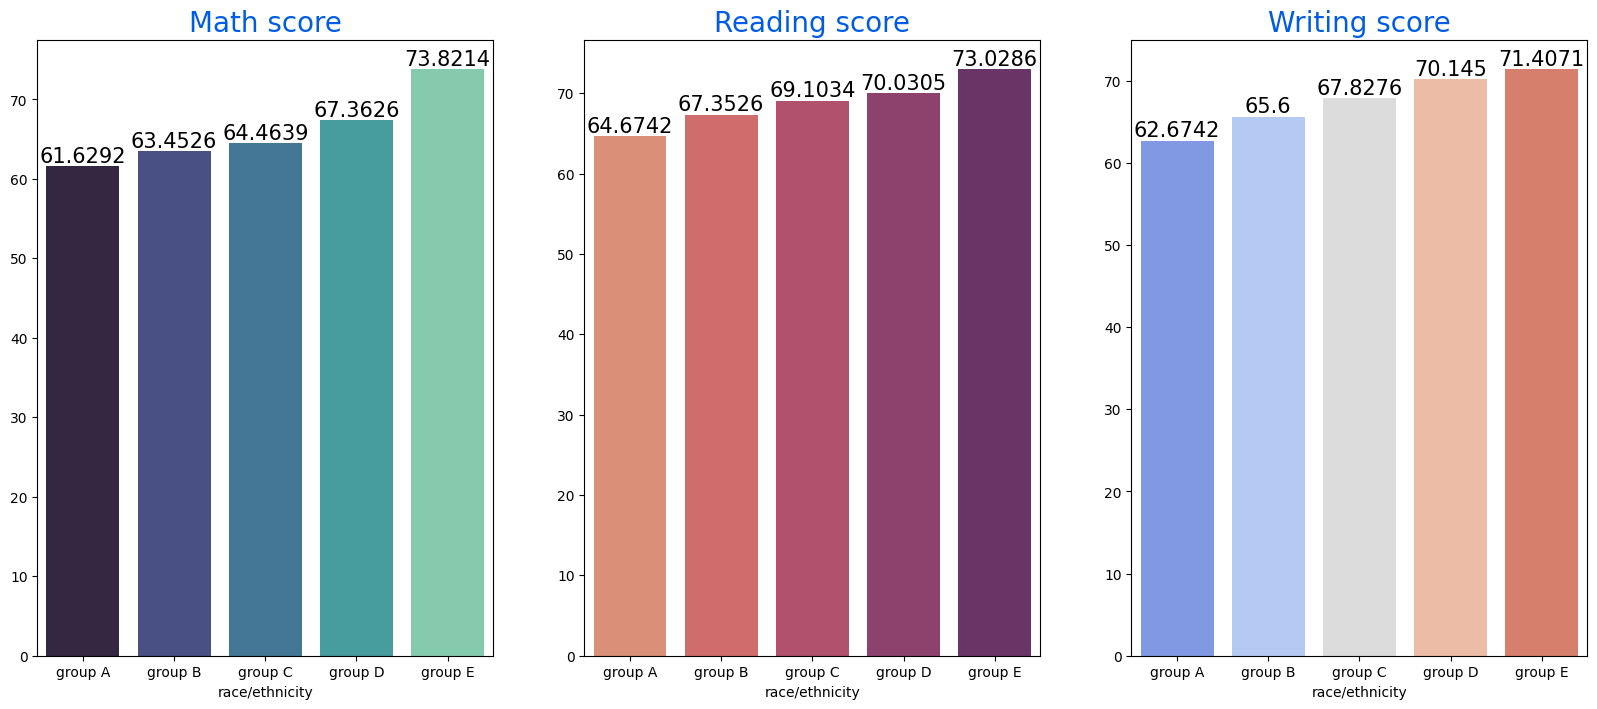

In [93]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2.index,y=Group_data2.values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data1.index,y=Group_data1.values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data3.index,y=Group_data3.values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

E Has Scored Highest Marks Whereas A has Scored lowest

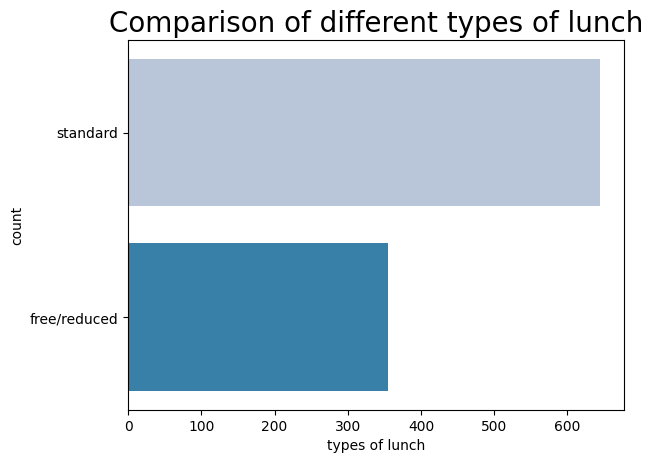

In [94]:
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Standard Lunch is More Common

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 